**Name : Aishwarya Bhavsar**<br>
**CECS 457 - Applied Macine Learning**<br>
**Date : 10/31/2022**<br>
**Dimension Reduction**


**Import Dataset**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("/content/Wine.csv")
df.sample(7)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
120,11.45,2.40,2.42,20.0,96,2.90,2.79,0.32,1.83,3.25,0.800,3.39,625,2
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.700,1.56,750,3
37,13.05,1.65,2.55,18.0,98,2.45,2.43,0.29,1.44,4.25,1.120,2.51,1105,1
88,11.64,2.06,2.46,21.6,84,1.95,1.69,0.48,1.35,2.80,1.000,2.75,680,2
70,12.29,1.61,2.21,20.4,103,1.10,1.02,0.37,1.46,3.05,0.906,1.82,870,2
93,12.29,2.83,2.22,18.0,88,2.45,2.25,0.25,1.99,2.15,1.150,3.30,290,2
150,13.50,3.12,2.62,24.0,123,1.40,1.57,0.22,1.25,8.60,0.590,1.30,500,3


In [4]:
df.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline',
       'Customer_Segment'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
 13  Customer_Segment      178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [6]:
df.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,1.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,1.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,1.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,2.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,3.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,3.000000


In [7]:
X = df.iloc[:,0:13].values
y = df.iloc[:,13].values

**Splitting The Dataset**

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=0)

In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.fit_transform(x_test)

# **Plain Logistic Regression Application**

In [48]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state = 0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

**Confusion Matrix Without PCA/LDA**

In [49]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print("This confusion matrix without PCA or LDA. ")
print(cm)

This confusion matrix without PCA or LDA. 
[[14  0  0]
 [ 0 15  1]
 [ 0  0  6]]


# **With PCA Logistic Regression Application**

In [38]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2) # we are reducing to 2 components.
X_trainPCA = pca.fit_transform(X_train)
X_testPCA = pca.transform(X_test)

In [39]:
model = LogisticRegression(random_state = 0)
model.fit(X_trainPCA, y_train)
y_predPCA = model.predict(X_testPCA)

**Calculate The Variance**

In [40]:
explained_varience = pca.explained_variance_ratio_
explained_varience

array([0.36884109, 0.19318394])

**Confusion Matrix with PCA**

In [41]:
cmPCA = confusion_matrix(y_test,y_predPCA)
print("This confusion matrix with PCA.")
print(cmPCA)

This confusion matrix with PCA.
[[14  0  0]
 [ 1 15  0]
 [ 0  0  6]]


**Visualise The Results**

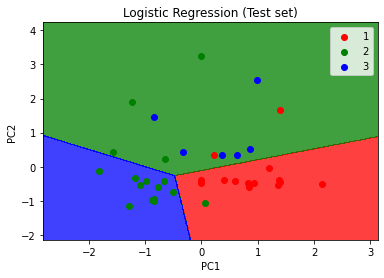

In [42]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

# **With LDA Logistic Regression Application**

In [50]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components = 2) # Again choosed 2 component.
X_train_LDA = lda.fit_transform(X_train, y_train)
X_test_LDA = lda.transform(X_test)

In [51]:
modelLDA = LogisticRegression(random_state = 0)
modelLDA.fit(X_train_LDA, y_train)
y_predLDA = modelLDA.predict(X_test_LDA)

**Confusion Matrix**

In [52]:
cmLDA = confusion_matrix(y_test, y_predLDA)
print("This confusion matrix with LDA.")
print(cmLDA)

This confusion matrix with LDA.
[[14  0  0]
 [ 0 16  0]
 [ 0  0  6]]


**Visualise The Results**

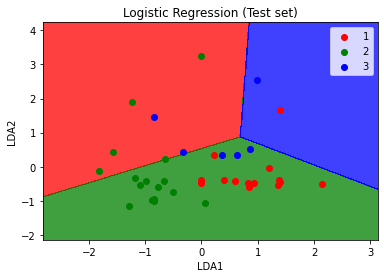

In [55]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, modelLDA.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('LDA1')
plt.ylabel('LDA2')
plt.legend()
plt.show()